![image info](https://seaborn.pydata.org/_images/function_overview_8_0.png)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
cars = sns.load_dataset('mpg')
cars.dropna(inplace=True)
cars['newer_model'] = cars.model_year > 76
cars['mpg_range'] = ['Low' if m < 19 else ('Medium' if m < 27 else 'High') for m in cars.mpg]
cars['type'] = ['old' if x <=76 else 'new' for x in cars.model_year]
cars['another_cat'] = ['fast' if x >= 100 else 'not fast' for x in cars.horsepower]
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,newer_model,mpg_range,type,another_cat
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,False,Low,old,fast
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,False,Low,old,fast
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,False,Low,old,fast
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,False,Low,old,fast
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,False,Low,old,fast


In [3]:
rows,cols = 52,3
data = np.random.rand(rows,cols) 
tidx = pd.date_range('2019-01-01', periods=rows, freq='W') 
time_series = pd.DataFrame(data, columns=['a','b','c'], index=tidx)
time_series.reset_index(inplace=True)
time_series.rename(columns={"index": "time"}, inplace=True)
time_series["d"] = ['high' if x > .6 else 'low' for x in time_series.c]
time_series.head()

,time,a,b,c,d
0,2019-01-06,0.800263,0.879877,0.367073,low
1,2019-01-13,0.524915,0.589370,0.631256,high
2,2019-01-20,0.934049,0.134679,0.018061,low
3,2019-01-27,0.256869,0.464728,0.986014,high
4,2019-02-03,0.761150,0.708209,0.187876,low


# Time Series
### Line Plot

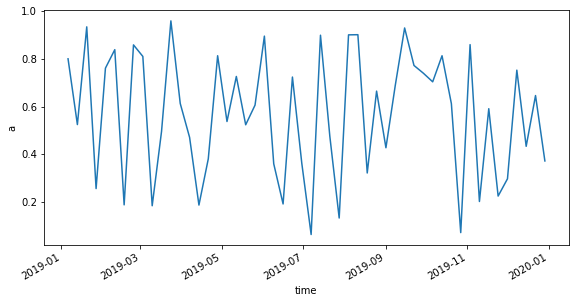

In [4]:
fig = plt.figure(figsize=(9.4, 4.8))
sns.lineplot(x=time_series.time, y=time_series.a)
plt.gcf().autofmt_xdate()

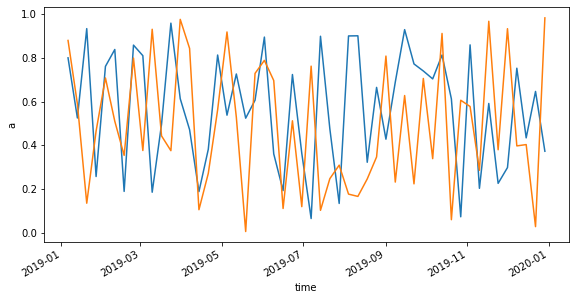

In [5]:
fig = plt.figure(figsize=(9.4, 4.8))

sns.lineplot(x=time_series.time, y=time_series.a)
sns.lineplot(x=time_series.time, y=time_series.b)
plt.gcf().autofmt_xdate()

<AxesSubplot:xlabel='time', ylabel='c'>

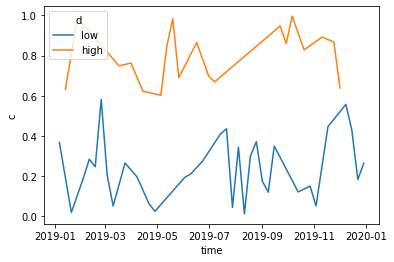

In [6]:
sns.lineplot(x=time_series.time, y=time_series.c, hue=time_series.d)

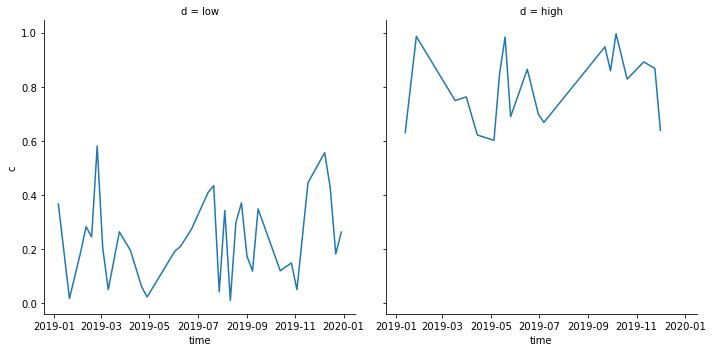

In [7]:
g = sns.FacetGrid(data=time_series, col="d", height=5)
g.map_dataframe(sns.lineplot, data=time_series, x="time", y="c")

# Comparison

### Bar Charts

#### Count Plot

<AxesSubplot:xlabel='origin', ylabel='count'>

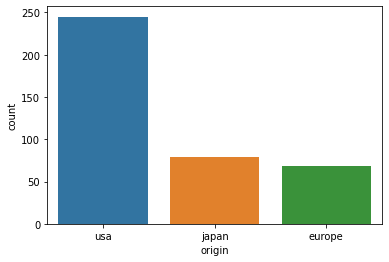

In [8]:
sns.countplot(x='origin', data=cars)

<AxesSubplot:xlabel='count', ylabel='origin'>

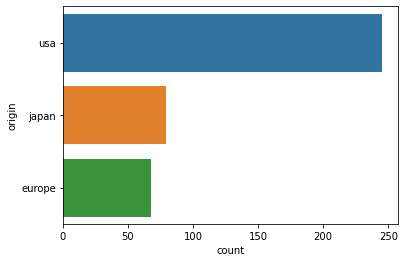

In [9]:
sns.countplot(y='origin', data=cars)

<AxesSubplot:xlabel='count', ylabel='origin'>

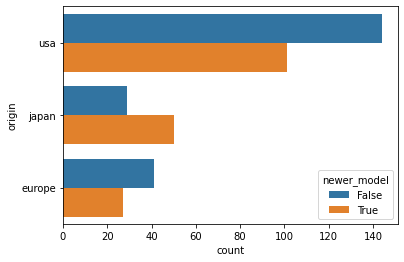

In [10]:
sns.countplot(y='origin', data=cars, hue='newer_model')

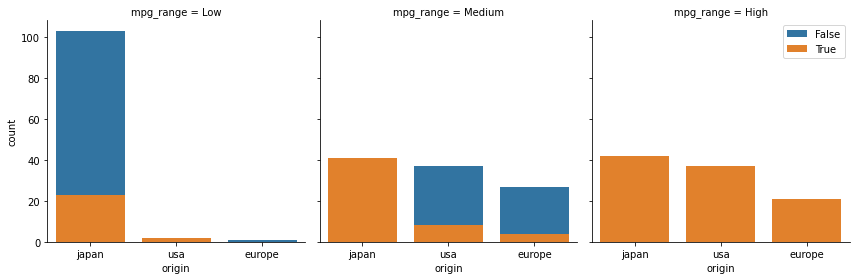

In [11]:
g = sns.FacetGrid(data=cars, col="mpg_range", hue='newer_model', height=4)
g.map(sns.countplot, 'origin')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


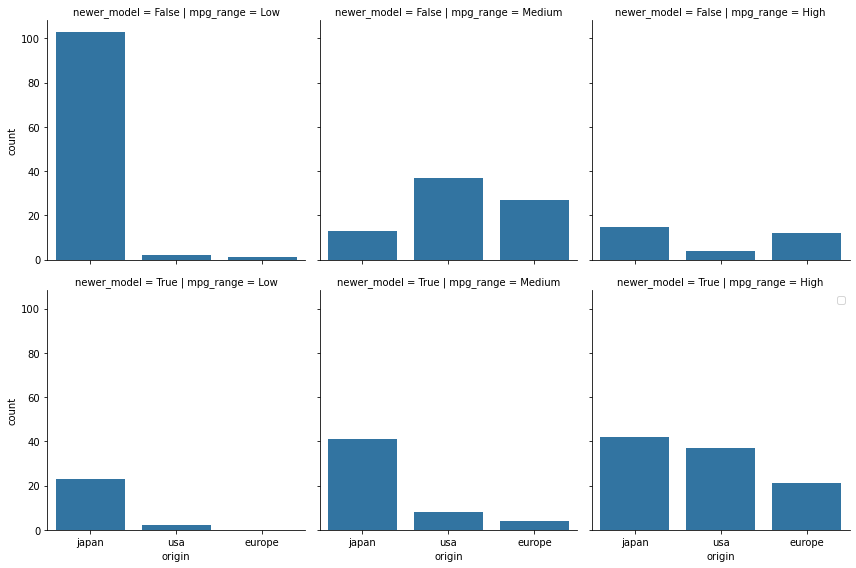

In [12]:
g = sns.FacetGrid(data=cars, col="mpg_range", row='newer_model', height=4)
g.map(sns.countplot, 'origin')
# g.set_xticklabels(rotation = 45)
plt.legend()

### Bar Plot
Show point estimates and confidence intervals as rectangular bars.

A bar plot represents an estimate of central tendency for a numeric
variable with the height of each rectangle and provides some indication of
the uncertainty around that estimate using error bars. Bar plots include 0
in the quantitative axis range, and they are a good choice when 0 is a
meaningful value for the quantitative variable, and you want to make
comparisons against it.

<AxesSubplot:xlabel='displacement', ylabel='origin'>

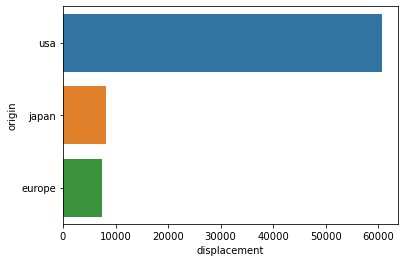

In [13]:
sns.barplot(x=cars.displacement, y=cars.origin, estimator=np.sum, ci=None) # estimator changes the measure

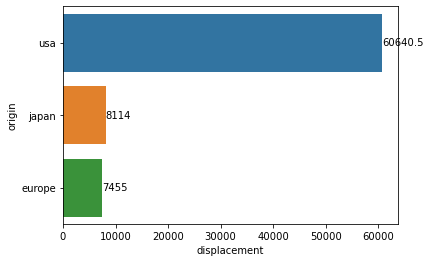

In [14]:
ax = sns.barplot(x=cars.displacement, y=cars.origin, estimator=np.sum, ci=None) # estimator changes the measure
for i in ax.containers:
    ax.bar_label(i,)

<AxesSubplot:xlabel='origin', ylabel='displacement'>

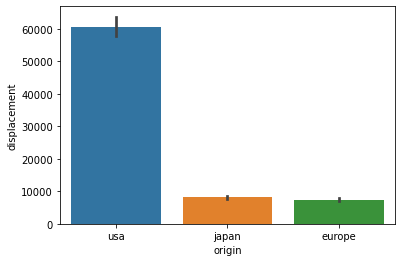

In [15]:
sns.barplot(y=cars.displacement, x=cars.origin, estimator=np.sum, ) # estimator changes the measure

<AxesSubplot:xlabel='displacement', ylabel='origin'>

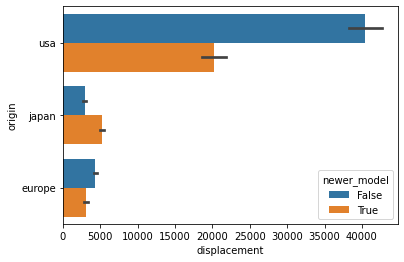

In [16]:
 # estimator changes the measure
sns.barplot(x=cars.displacement, y=cars.origin, estimator=np.sum, hue=cars.newer_model )

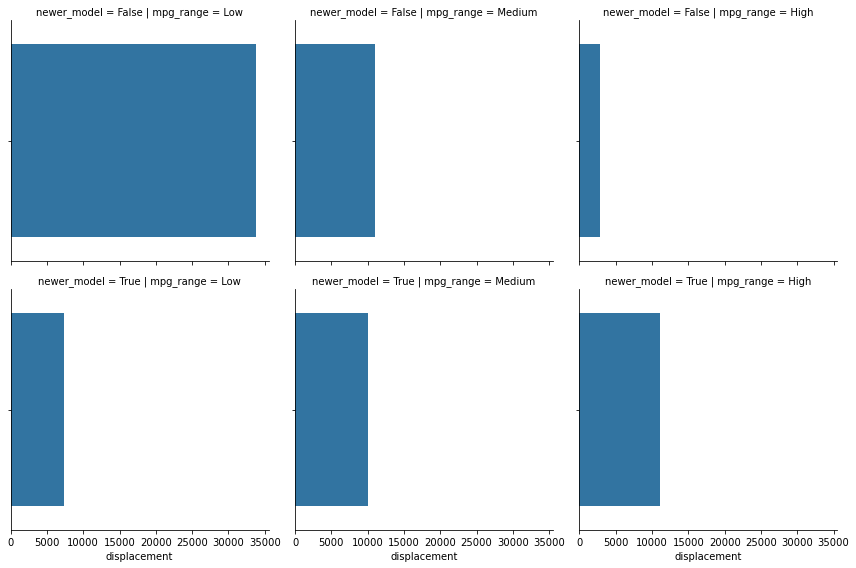

In [17]:
g = sns.FacetGrid(data=cars, col="mpg_range", row='newer_model', height=4)
g.map(sns.barplot, 'displacement', estimator=np.sum, ci=False)

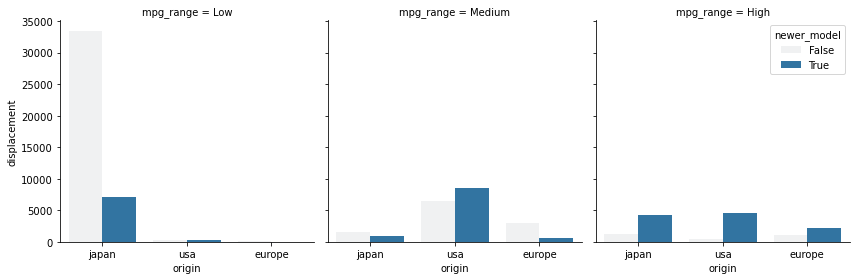

In [18]:
g = sns.FacetGrid(data=cars, col="mpg_range", height=4, )
g.map_dataframe(sns.barplot, y='displacement', x="origin", hue='newer_model', estimator=np.sum, ci=False)
plt.legend().set_title('newer_model')

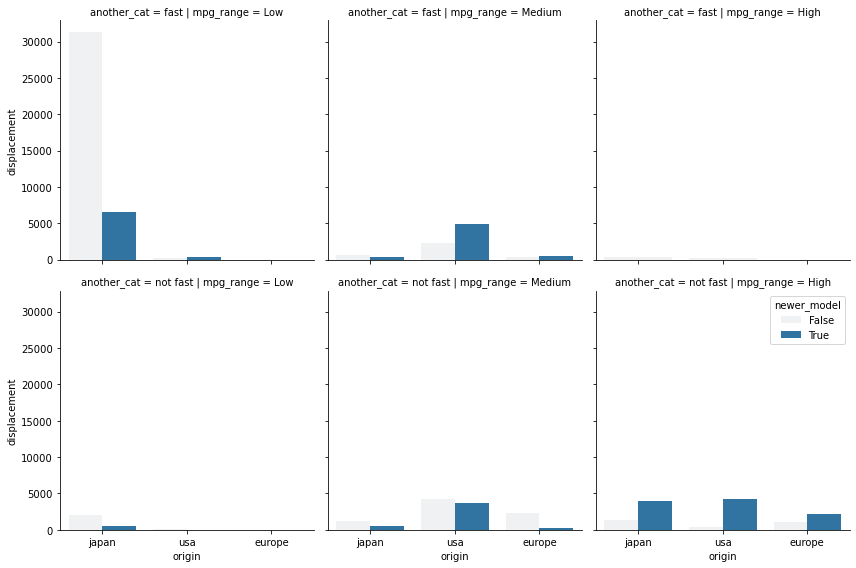

In [19]:
g = sns.FacetGrid(data=cars, col="mpg_range", row='another_cat', height=4, )
g.map_dataframe(sns.barplot, y='displacement', x="origin", hue='newer_model', estimator=np.sum, ci=False)
plt.legend().set_title('newer_model')

<AxesSubplot:xlabel='count', ylabel='origin'>

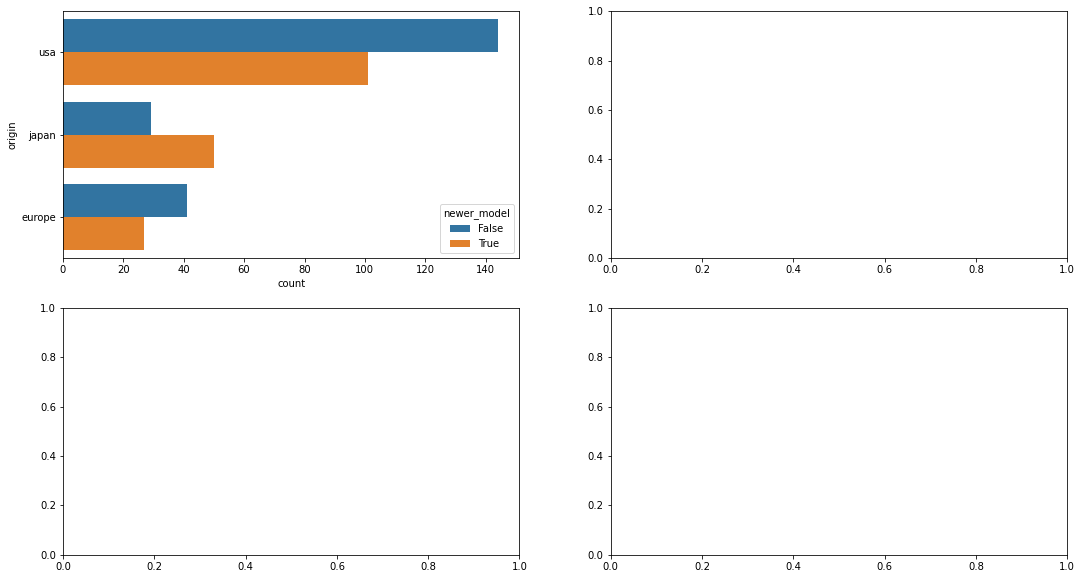

In [20]:
# Manual Config

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

sns.countplot(y='origin', data=cars, hue='newer_model', ax=axes[0, 0])

# Distributions

### Histogram

- Stat

    - `count`: show the number of observations in each bin
    - `frequency`: show the number of observations divided by the bin width
    - `probability`: or `proportion`: normalize such that bar heights sum to 1
    - `percent`: normalize such that bar heights sum to 100
    - `density`: normalize such that the total area of the histogram equals 1

<AxesSubplot:xlabel='displacement', ylabel='Count'>

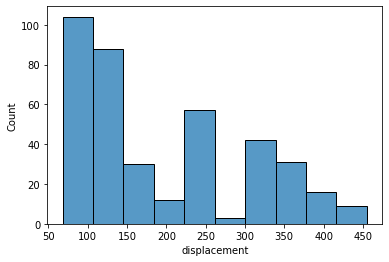

In [21]:
sns.histplot(x=cars.displacement, stat='count')

<AxesSubplot:xlabel='displacement', ylabel='Count'>

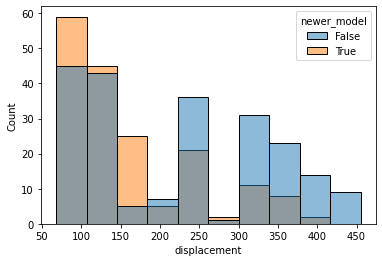

In [22]:
sns.histplot(x=cars.displacement, hue=cars.newer_model, stat='count') #Overlapping

<AxesSubplot:xlabel='displacement', ylabel='Count'>

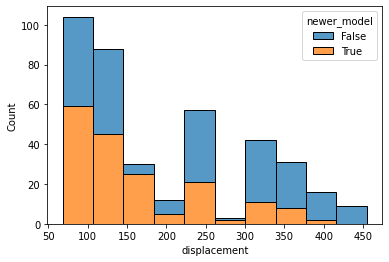

In [23]:
sns.histplot(x=cars.displacement, hue=cars.newer_model, stat='count', multiple="stack") #Stacked

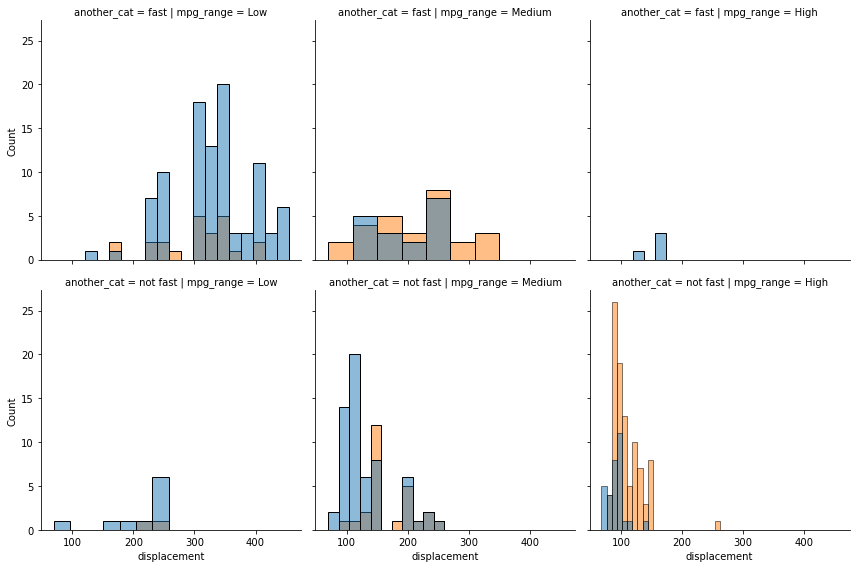

In [24]:
g = sns.FacetGrid(data=cars, col="mpg_range", row='another_cat', height=4, )
g.map_dataframe(sns.histplot, x='displacement', hue='newer_model')


### Box Plots

<AxesSubplot:xlabel='displacement'>

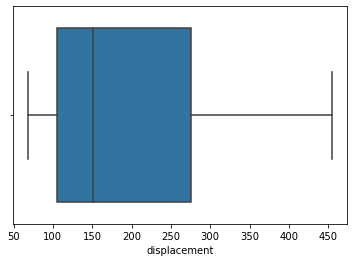

In [25]:
sns.boxplot(x=cars.displacement)

<AxesSubplot:xlabel='displacement', ylabel='origin'>

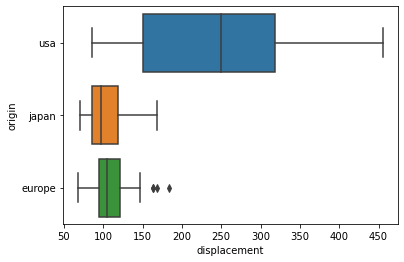

In [26]:
sns.boxplot(x=cars.displacement, y=cars.origin)

<AxesSubplot:xlabel='displacement', ylabel='origin'>

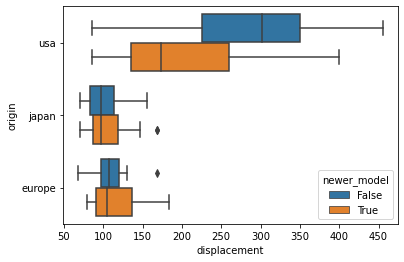

In [27]:
sns.boxplot(x=cars.displacement, y=cars.origin, hue=cars.newer_model)

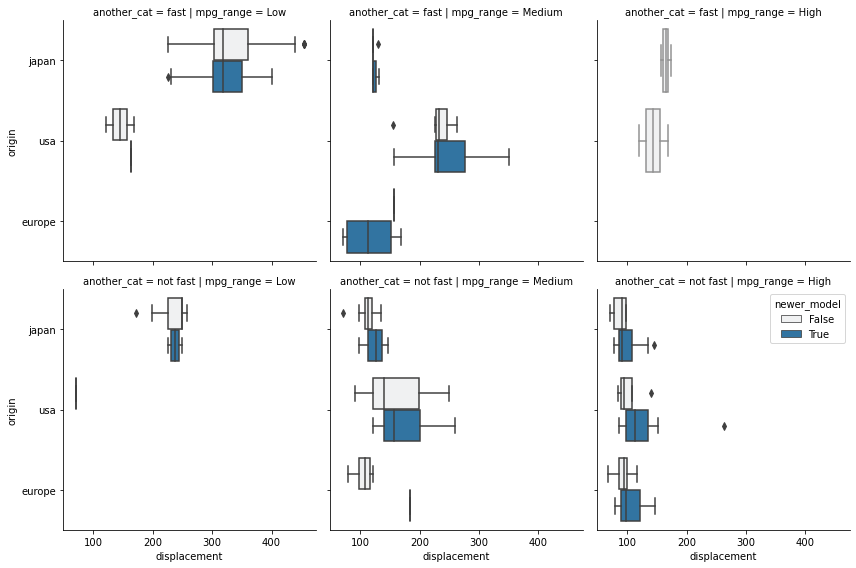

In [28]:
g = sns.FacetGrid(data=cars, col="mpg_range", row='another_cat', height=4,)
g.map_dataframe(sns.boxplot, x="displacement", y="origin", hue="newer_model")
plt.legend().set_title('newer_model')

### Boxen Plot

<AxesSubplot:xlabel='displacement'>

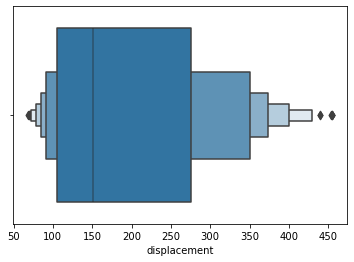

In [29]:
sns.boxenplot(x=cars.displacement)

<AxesSubplot:xlabel='displacement', ylabel='origin'>

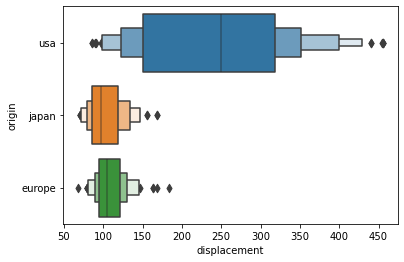

In [30]:
sns.boxenplot(x=cars.displacement, y=cars.origin)

<AxesSubplot:xlabel='displacement', ylabel='origin'>

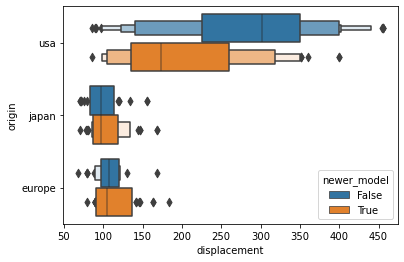

In [31]:
sns.boxenplot(x=cars.displacement, y=cars.origin, hue=cars.newer_model)

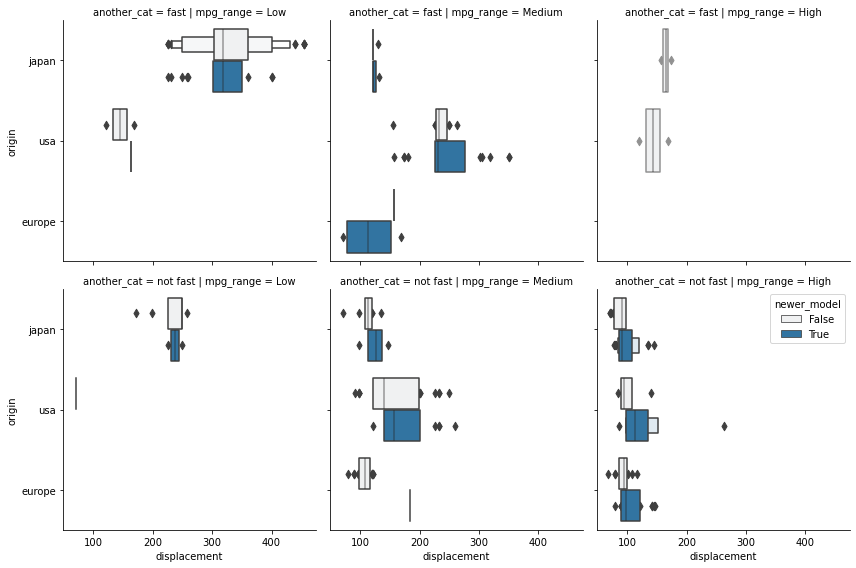

In [32]:
g = sns.FacetGrid(data=cars, col="mpg_range", row='another_cat', height=4,)
g.map_dataframe(sns.boxenplot, x="displacement", y="origin", hue="newer_model")
plt.legend().set_title('newer_model')

### Violin Plot

<AxesSubplot:xlabel='displacement'>

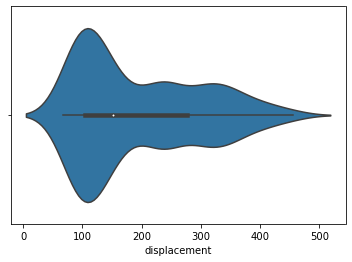

In [33]:
sns.violinplot(x=cars.displacement)

<AxesSubplot:xlabel='displacement', ylabel='origin'>

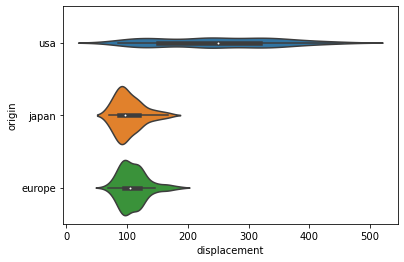

In [34]:
sns.violinplot(x=cars.displacement, y=cars.origin)

<AxesSubplot:xlabel='displacement', ylabel='origin'>

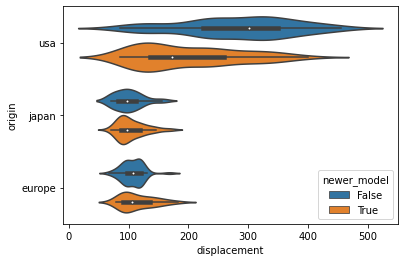

In [35]:
sns.violinplot(x=cars.displacement, y=cars.origin, hue=cars.newer_model)

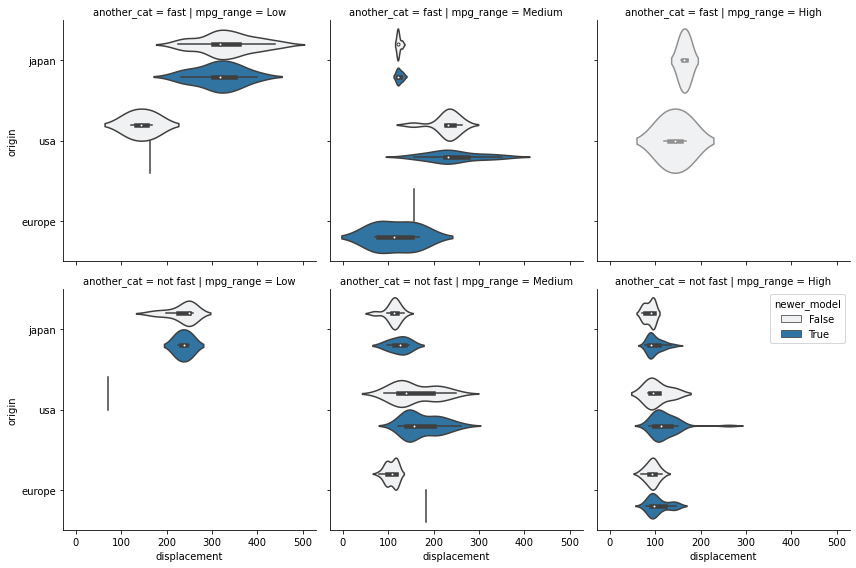

In [36]:
g = sns.FacetGrid(data=cars, col="mpg_range", row='another_cat', height=4,)
g.map_dataframe(sns.violinplot, x="displacement", y="origin", hue="newer_model")
plt.legend().set_title('newer_model')

### Swarm Plot

<AxesSubplot:xlabel='displacement'>

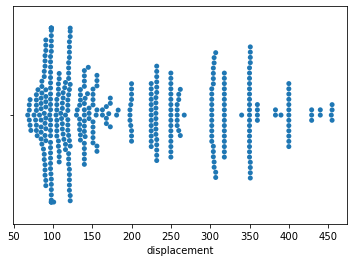

In [37]:
sns.swarmplot(x=cars.displacement)

<AxesSubplot:xlabel='displacement', ylabel='origin'>

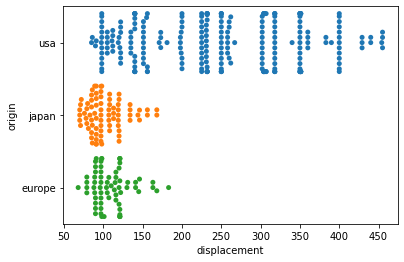

In [38]:
sns.swarmplot(x=cars.displacement, y=cars.origin)

<AxesSubplot:xlabel='displacement', ylabel='origin'>

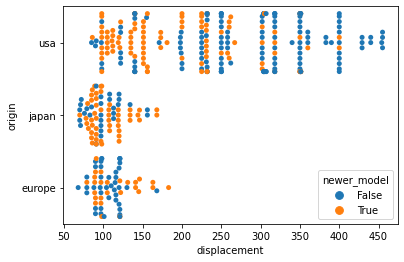

In [39]:
sns.swarmplot(x=cars.displacement, y=cars.origin, hue=cars.newer_model)

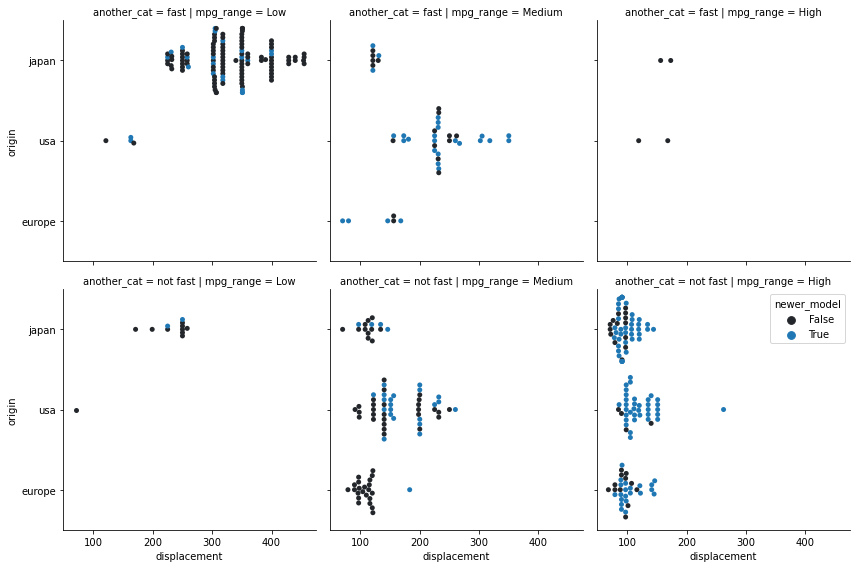

In [40]:
g = sns.FacetGrid(data=cars, col="mpg_range", row='another_cat', height=4,)
g.map_dataframe(sns.swarmplot, x="displacement", y="origin", hue="newer_model")
plt.legend().set_title('newer_model')

### Strip Plot

<AxesSubplot:xlabel='displacement'>

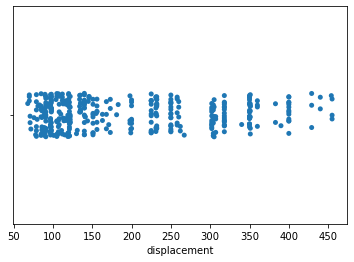

In [41]:
sns.stripplot(x=cars.displacement)

<AxesSubplot:xlabel='displacement', ylabel='origin'>

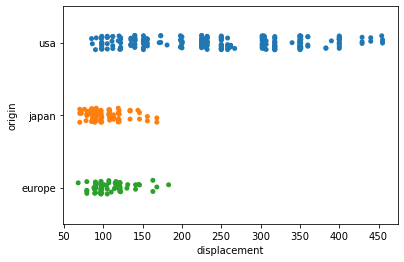

In [42]:
sns.stripplot(x=cars.displacement, y=cars.origin)

<AxesSubplot:xlabel='displacement', ylabel='origin'>

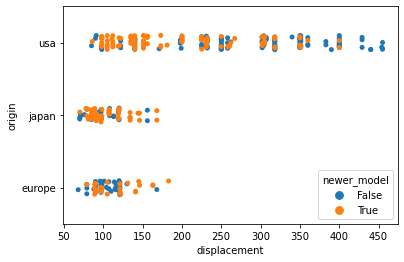

In [43]:
sns.stripplot(x=cars.displacement, y=cars.origin, hue=cars.newer_model)

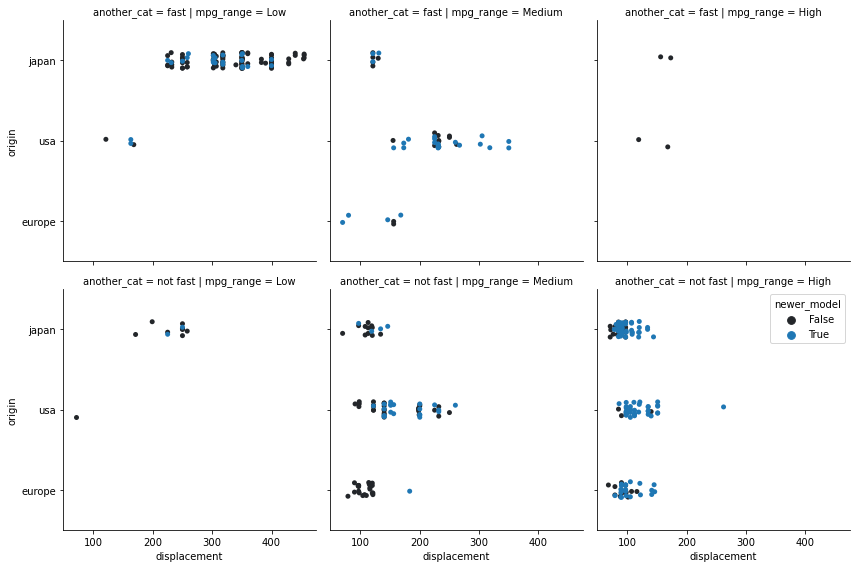

In [44]:
g = sns.FacetGrid(data=cars, col="mpg_range", row='another_cat', height=4,)
g.map_dataframe(sns.stripplot, x="displacement", y="origin", hue="newer_model")
plt.legend().set_title('newer_model')

### Rug Plot

<AxesSubplot:xlabel='displacement'>

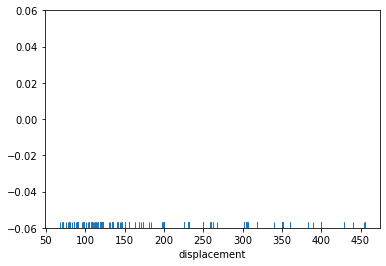

In [45]:
sns.rugplot(x=cars.displacement)

<AxesSubplot:xlabel='displacement', ylabel='origin'>

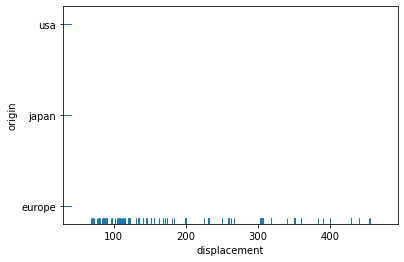

In [46]:
sns.rugplot(x=cars.displacement, y=cars.origin)

<AxesSubplot:xlabel='displacement', ylabel='origin'>

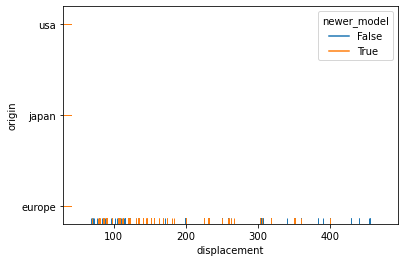

In [47]:
sns.rugplot(x=cars.displacement, y=cars.origin, hue=cars.newer_model)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


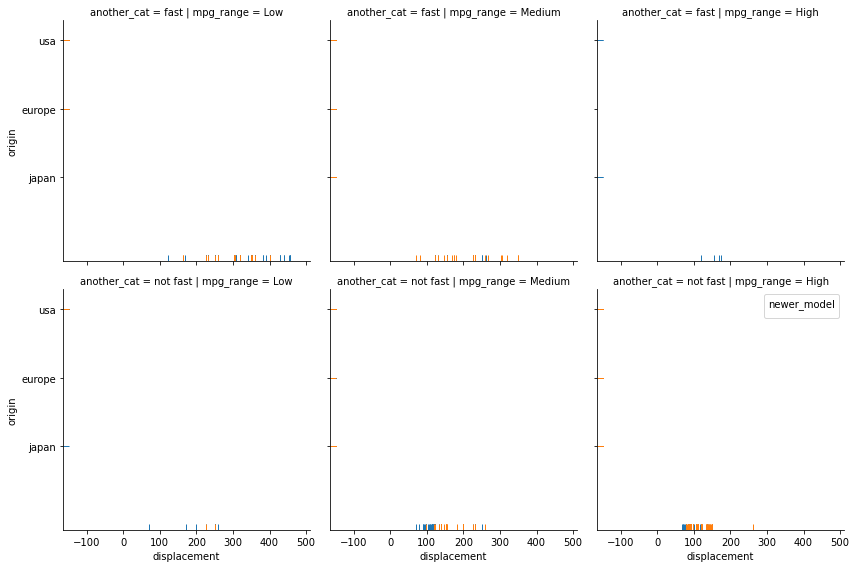

In [48]:
g = sns.FacetGrid(data=cars, col="mpg_range", row='another_cat', height=4,)
g.map_dataframe(sns.rugplot, x="displacement", y="origin", hue="newer_model")
plt.legend().set_title('newer_model')

# Relationships

### Scatterplot

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

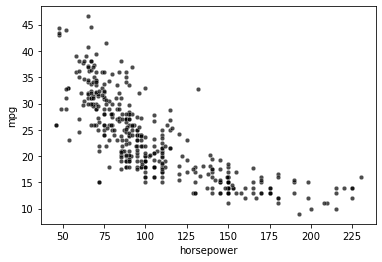

In [49]:
sns.scatterplot(cars.horsepower, cars.mpg, color='black', alpha=0.7, s=20)

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

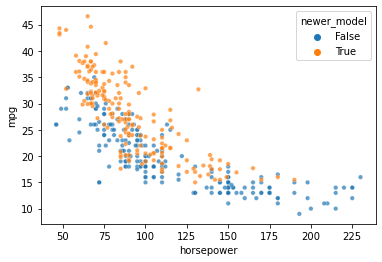

In [50]:
sns.scatterplot(cars.horsepower, cars.mpg, hue=cars.newer_model, alpha=0.7, s=20)

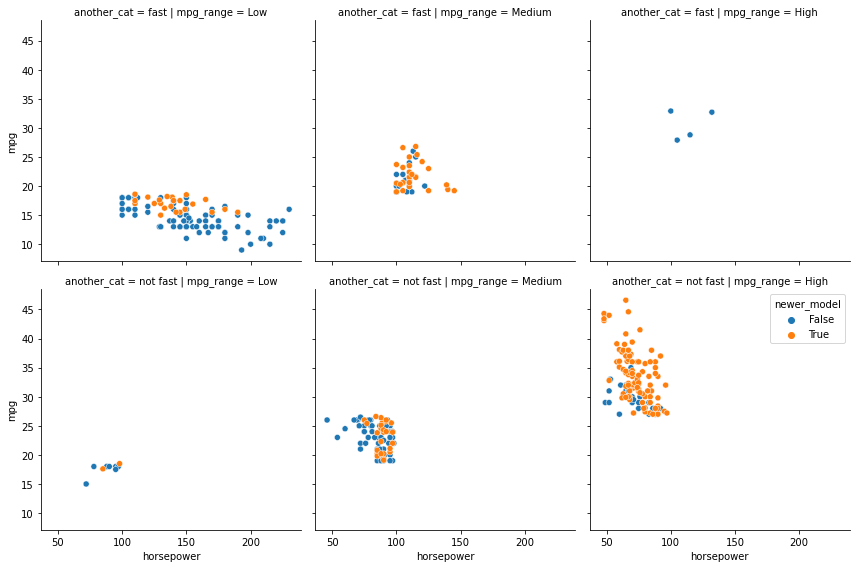

In [51]:
g = sns.FacetGrid(data=cars, col="mpg_range", row='another_cat', height=4,)
g.map_dataframe(sns.scatterplot, x="horsepower", y="mpg", hue="newer_model")
plt.legend().set_title('newer_model')

### Scatter with line plot

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

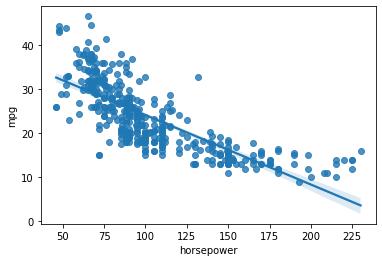

In [52]:
sns.regplot(cars.horsepower, cars.mpg)

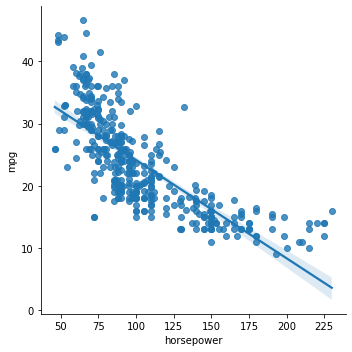

In [53]:
sns.lmplot(data=cars, x="horsepower", y="mpg")

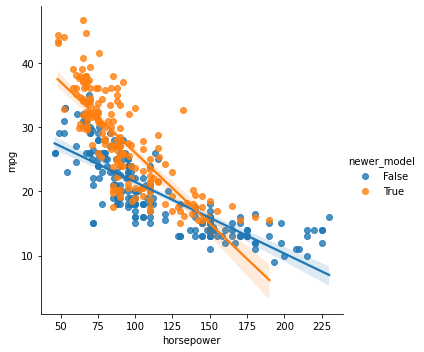

In [54]:
sns.lmplot(data=cars, x="horsepower", y="mpg", hue="newer_model")

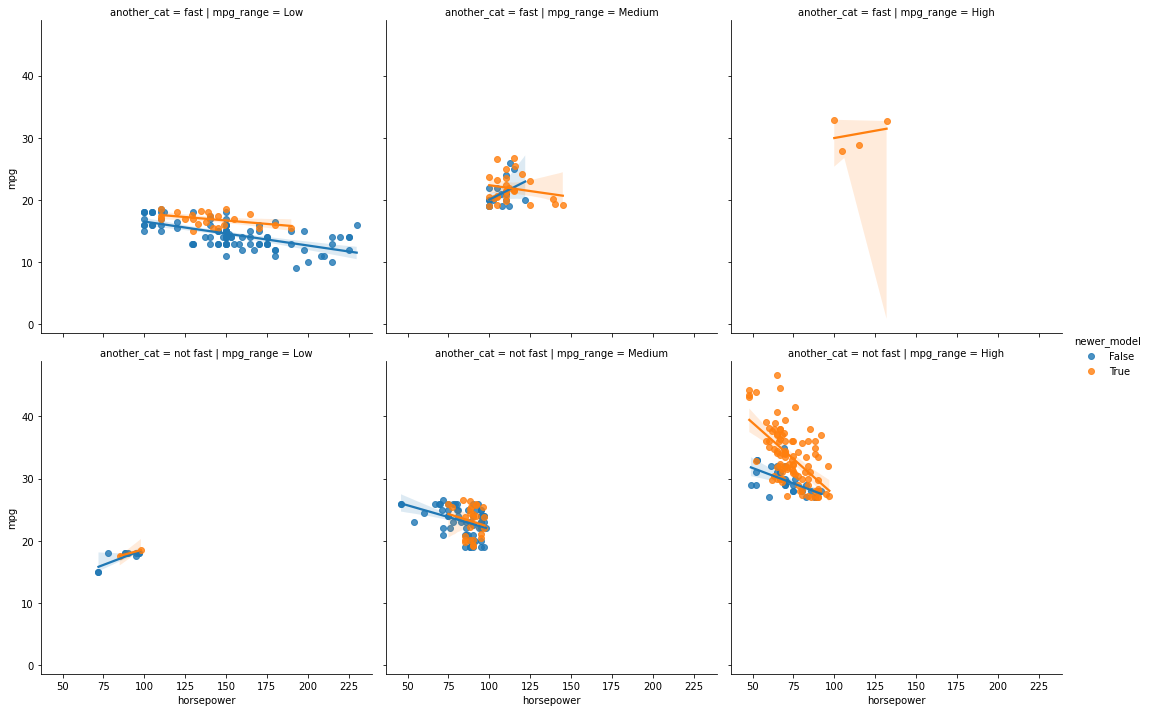

In [55]:
sns.lmplot(data=cars, x="horsepower", y="mpg", hue="newer_model", col="mpg_range", row='another_cat')

### Histplot

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

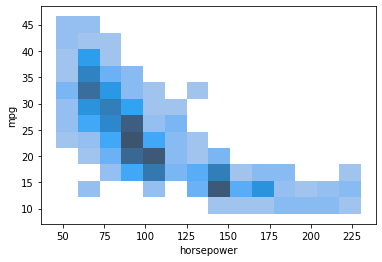

In [56]:
sns.histplot(data=cars, x="horsepower", y="mpg")

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

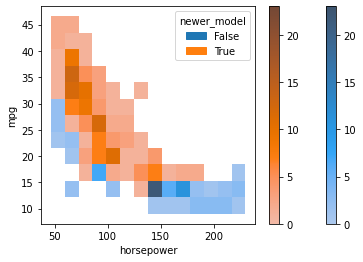

In [57]:
sns.histplot(data=cars, x="horsepower", y="mpg", hue="newer_model", cbar=True)

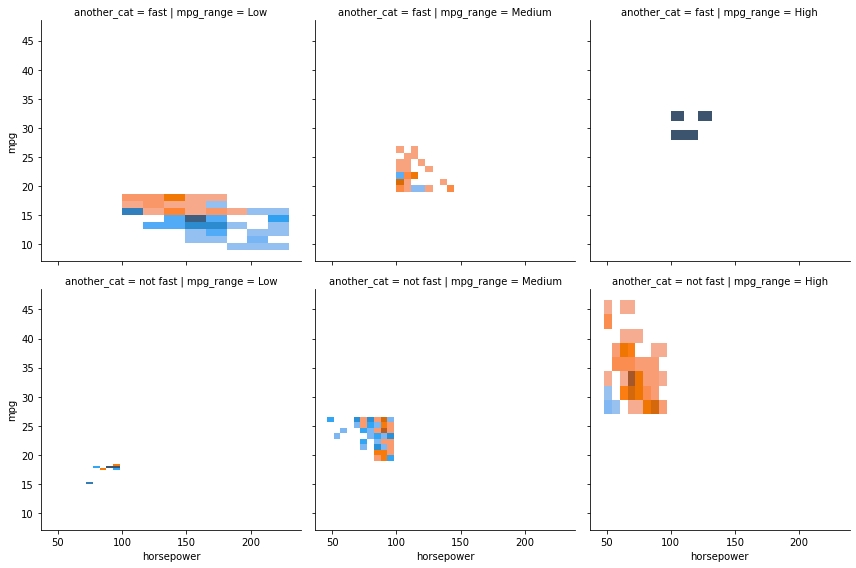

In [58]:
g = sns.FacetGrid(data=cars, col="mpg_range", row='another_cat', height=4,)
g.map_dataframe(sns.histplot, data=cars, x="horsepower", y="mpg", hue="newer_model")

### KDE Plot

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

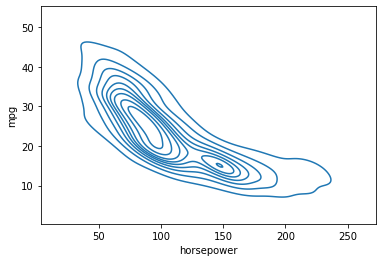

In [59]:
sns.kdeplot(data=cars, x="horsepower", y="mpg")

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

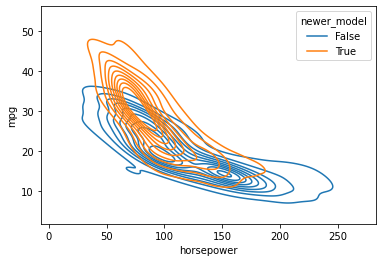

In [60]:
sns.kdeplot(data=cars, x="horsepower", y="mpg", hue="newer_model")

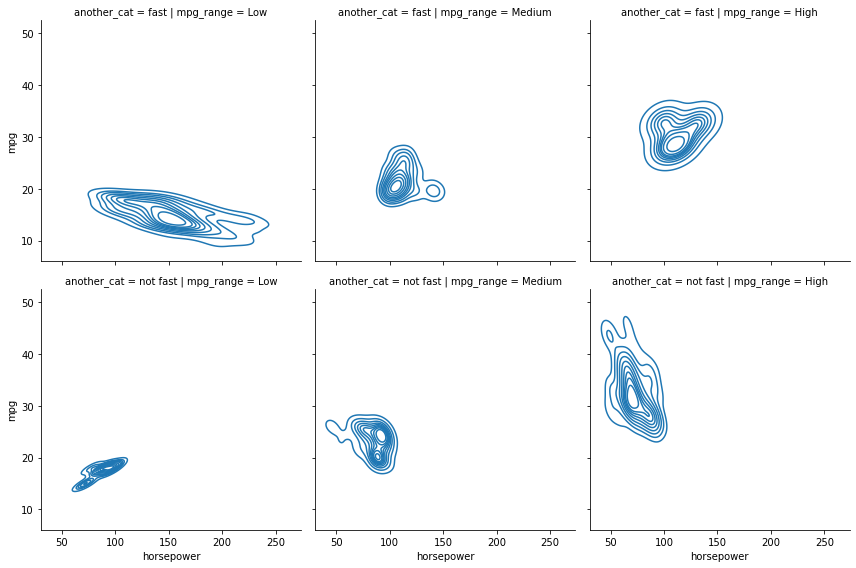

In [61]:
g = sns.FacetGrid(data=cars, col="mpg_range", row='another_cat', height=4,)
g.map_dataframe(sns.kdeplot, data=cars, x="horsepower", y="mpg")

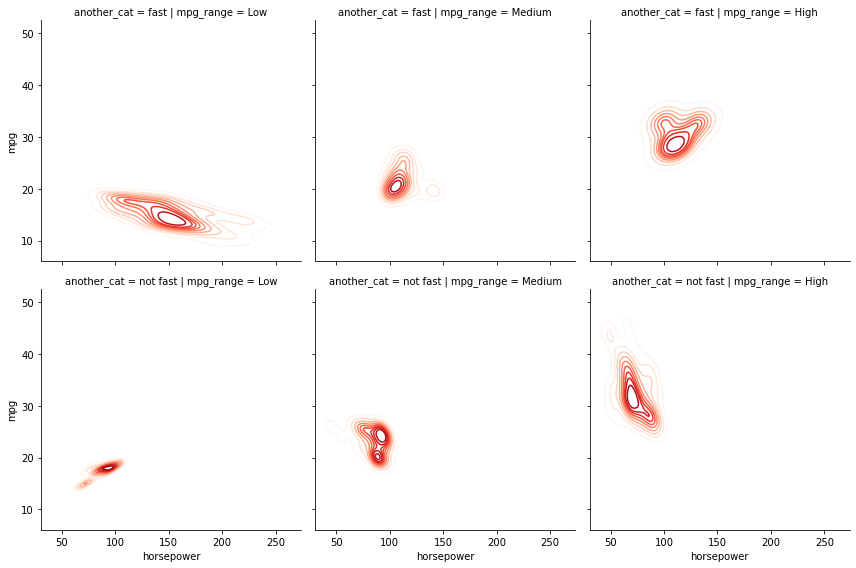

In [62]:
g = sns.FacetGrid(data=cars, col="mpg_range", row='another_cat', height=4,)
g.map_dataframe(sns.kdeplot, data=cars, x="horsepower", y="mpg", cmap='Reds')

### HeatMap


In [63]:
cmap_choices = ['Accent', 'Accent_r', 'Blues', 'Blues_r',
 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu',
 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r',
 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys',
 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r',
 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1',
 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r',
 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr',
 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r',
 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r',
 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds',
 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3',
 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r',
 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r',
 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn',
 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg',
 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool',
 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r',
 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag',
 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r',
 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar',
 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern',
 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2',
 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv',
 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet',
 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral',
 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma',
 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket',
 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer',
 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b',
 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo',
 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted',
 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag',
 'vlag_r', 'winter', 'winter_r']


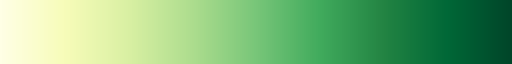

In [64]:
sns.color_palette("YlGn", as_cmap=True)

In [65]:
# Prepare Data for Heatmap
cross_data = pd.crosstab(cars.another_cat, cars.mpg_range)
cross_data

mpg_range,High,Low,Medium
another_cat,,,
fast,4,119,44
not fast,127,12,86


<AxesSubplot:xlabel='mpg_range', ylabel='another_cat'>

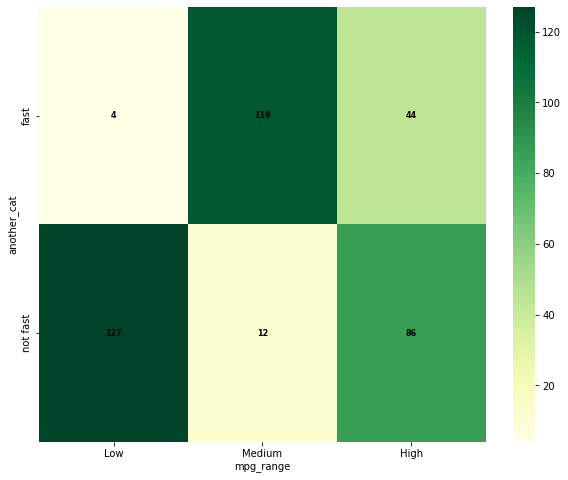

In [66]:
plt.figure(figsize=(10,8))
sns.heatmap(data=cross_data, 
            cmap='YlGn',
            xticklabels=cars.mpg_range.unique(),
            yticklabels=cars.another_cat.unique(),
            annot=True,
            fmt='g',
            annot_kws={'fontsize':8, 'fontweight': 'bold', 'color': 'black'}
           )